<a href="https://colab.research.google.com/github/devel75/Colab_GIS_EDA_GEO/blob/main/EDA_GEO_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas -q
!pip install mapclassify -q
!pip install pysal -q

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import os
os.kill(os.getpid(), 9)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from google.colab import files
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import libpysal as lps
import esda

from splot.esda import plot_moran, moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/osgeokr/ESDA/main/DATA/JINJU_PRICE.csv')
data_df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A16,A17,A18,A19,A20,A21,A22,A23,xcoord,ycoord
0,4812534036202430000,4812534036,경상남도 창원시 마산합포구 진전면 고사리,2,산,243,산243임,2022,1,2400,...,농림지역,720,자연림,5,삼각형,12,맹지,2022/08/21,1.078762e+06,1.683194e+06
1,4817042026104500006,4817042026,경상남도 진주시 집현면 정수리,1,일반,450-6,450-6 답,2022,1,27500,...,생산관리지역,610,답,4,사다리형,6,소로한면,2022/08/21,1.052703e+06,1.700845e+06
2,4817044026105020002,4817044026,경상남도 진주시 명석면 신기리,1,일반,502-2,502-2 대,2022,1,40000,...,계획관리지역,110,단독,5,삼각형,8,세로한면(가),2022/08/21,1.048380e+06,1.699743e+06
3,4817040021108790000,4817040021,경상남도 진주시 대곡면 설매리,1,일반,879,879 전,2022,1,18000,...,계획관리지역,510,전,5,삼각형,12,맹지,2022/08/21,1.060891e+06,1.698576e+06
4,4817044023102250001,4817044023,경상남도 진주시 명석면 남성리,1,일반,225-1,225-1 전,2022,1,10000,...,보전관리지역,510,전,5,삼각형,10,세로한면(불),2022/08/21,1.050278e+06,1.699830e+06


In [ ]:
data_gdf = gpd.GeoDataFrame(data_df, geometry=gpd.points_from_xy(data_df.xcoord, data_df.ycoord), crs='EPSG:5179')
data_gdf.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A17,A18,A19,A20,A21,A22,A23,xcoord,ycoord,geometry
0,4812534036202430000,4812534036,경상남도 창원시 마산합포구 진전면 고사리,2,산,243,산243임,2022,1,2400,...,720,자연림,5,삼각형,12,맹지,2022/08/21,1.078762e+06,1.683194e+06,POINT (1078761.560 1683194.383)
1,4817042026104500006,4817042026,경상남도 진주시 집현면 정수리,1,일반,450-6,450-6 답,2022,1,27500,...,610,답,4,사다리형,6,소로한면,2022/08/21,1.052703e+06,1.700845e+06,POINT (1052702.657 1700845.331)
2,4817044026105020002,4817044026,경상남도 진주시 명석면 신기리,1,일반,502-2,502-2 대,2022,1,40000,...,110,단독,5,삼각형,8,세로한면(가),2022/08/21,1.048380e+06,1.699743e+06,POINT (1048380.349 1699742.848)
3,4817040021108790000,4817040021,경상남도 진주시 대곡면 설매리,1,일반,879,879 전,2022,1,18000,...,510,전,5,삼각형,12,맹지,2022/08/21,1.060891e+06,1.698576e+06,POINT (1060890.786 1698575.920)
4,4817044023102250001,4817044023,경상남도 진주시 명석면 남성리,1,일반,225-1,225-1 전,2022,1,10000,...,510,전,5,삼각형,10,세로한면(불),2022/08/21,1.050278e+06,1.699830e+06,POINT (1050278.306 1699829.579)


In [ ]:
len(data_gdf)

5237

In [ ]:
nbr_gdf = gpd.read_file('https://raw.githubusercontent.com/osgeokr/ESDA/main/DATA/JINJU_ADM.geojson')
nbr_gdf.head()

,A0,A1,A2,A3,geometry
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488..."
1,306,48170126,평거동,2022-11-23,"MULTIPOLYGON (((1050063.502 1687614.405, 10501..."
2,1925,48170122,초전동,2022-11-23,"MULTIPOLYGON (((1057047.894 1691326.538, 10570..."
3,1926,48170420,집현면,2022-11-23,"MULTIPOLYGON (((1055557.823 1691590.960, 10555..."
4,1911,48170127,이현동,2022-11-23,"MULTIPOLYGON (((1048967.990 1690191.710, 10489..."


Text(0.5, 1.0, '진주시 법정구역')

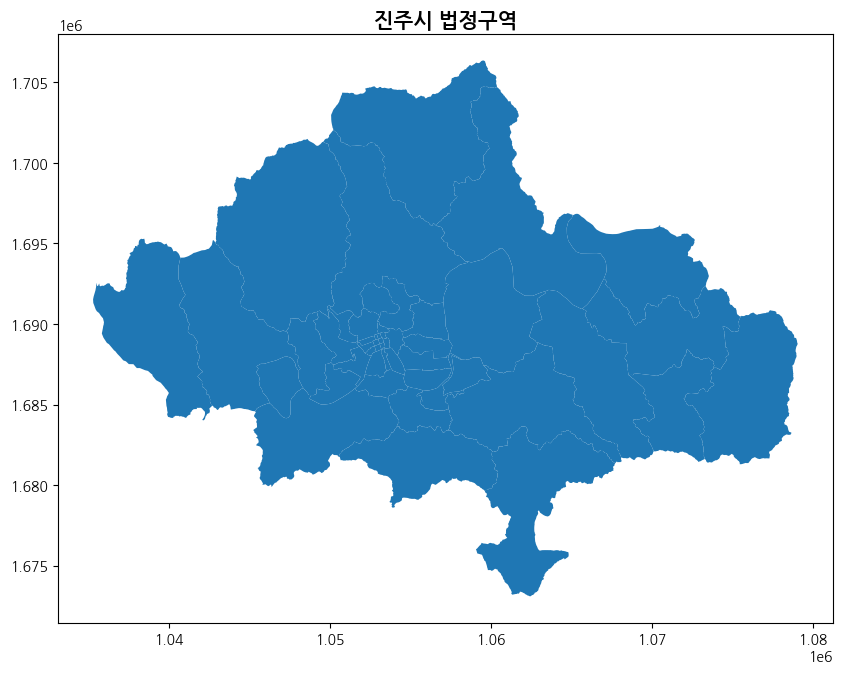

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
nbr_gdf.plot(ax=ax)
ax.set_title('진주시 법정구역', fontsize=15, fontweight='bold')

In [ ]:
len(nbr_gdf)

49

In [ ]:
prices = gpd.sjoin(nbr_gdf, data_gdf[['A9','geometry']], op='contains')
prices.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,A0,A1,A2,A3,geometry,index_right,A9
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",4288,1420000
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",3695,734500
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",3607,570000
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",3374,458500
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",3610,477500


In [ ]:
pd.options.display.float_format = '{:.1f}'.format

# 법정구역별 평균 공시지가
nbr_avg_price = prices['A9'].groupby([prices['A2']]).mean()
nbr_final = nbr_gdf.merge(nbr_avg_price, on='A2')
nbr_final.rename(columns={'A2': 'adm'}, inplace=True)
nbr_final.rename(columns={'A9': 'avg_price'}, inplace=True)
nbr_final.head()


,A0,A1,adm,A3,geometry,avg_price
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",223839.1
1,306,48170126,평거동,2022-11-23,"MULTIPOLYGON (((1050063.502 1687614.405, 10501...",1078855.4
2,1925,48170122,초전동,2022-11-23,"MULTIPOLYGON (((1057047.894 1691326.538, 10570...",832282.9
3,1926,48170420,집현면,2022-11-23,"MULTIPOLYGON (((1055557.823 1691590.960, 10555...",64400.8
4,1911,48170127,이현동,2022-11-23,"MULTIPOLYGON (((1048967.990 1690191.710, 10489...",393777.3


In [ ]:
m = folium.Map(location=[35.1847, 128.1131], zoom_start=11)
folium.TileLayer('CartoDB positron').add_to(m)

title = '진주시 법정구역별 평균 공시지가'
title_html = '''
             <h3 align="center"><b>{}</b></h3>
             '''.format(title)
m.get_root().html.add_child(folium.Element(title_html))

choropleth = folium.Choropleth(geo_data=nbr_final,
    data=nbr_final,
    bins=5, # 5단계
    columns=['adm', 'avg_price'],
    key_on='feature.properties.adm',
    line_color='black',
    line_width=1,
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='평균 공시지가(원/㎡, 기준일: 2022.9.29.)'
).add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm','avg_price'], labels=True, localize=True))

m.save('JINJU_ADM_AVG_PRICE.html')
files.download('JINJU_ADM_AVG_PRICE.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

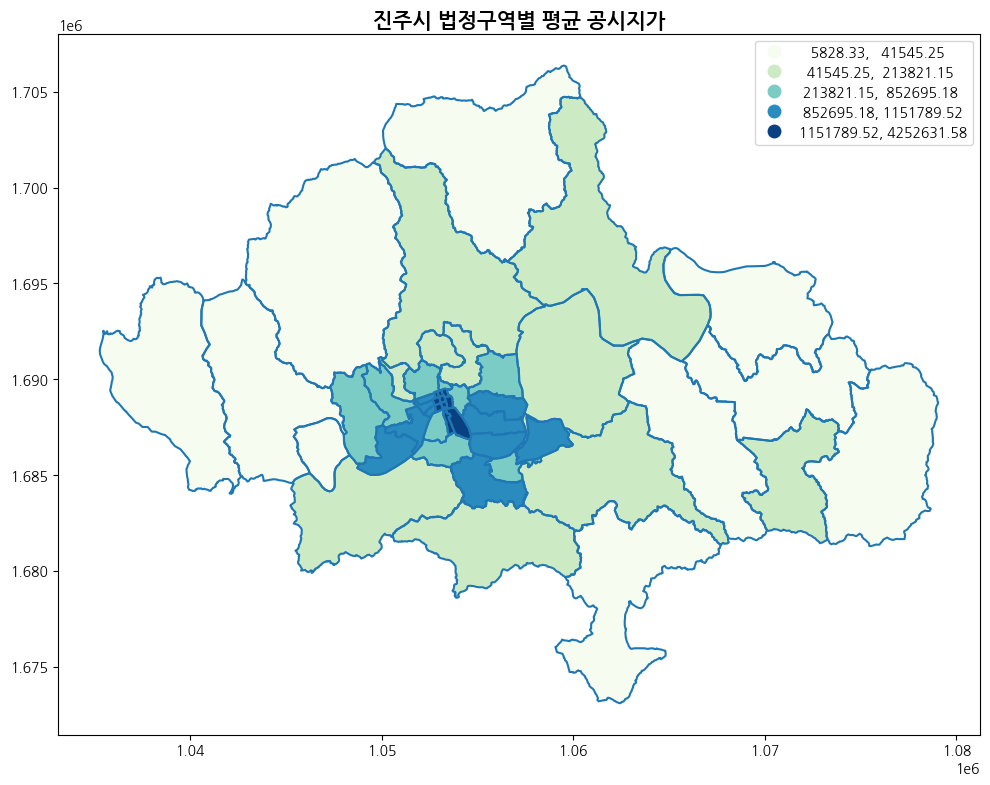

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
nbr_final.plot(column='avg_price', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax) # 분위수
nbr_final.boundary.plot(ax=ax)
plt.title('진주시 법정구역별 평균 공시지가', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# 공간 유사성(Spatial similarity)
w =  lps.weights.Queen.from_dataframe(nbr_final)
w.transform = 'r'

# 속성 유사성(Attribute similarity)
nbr_final['weighted_price'] = lps.weights.lag_spatial(w, nbr_final['avg_price'])
nbr_final.head()

,A0,A1,adm,A3,geometry,avg_price,weighted_price
0,305,48170129,판문동,2022-11-23,"MULTIPOLYGON (((1048840.967 1685593.175, 10488...",223839.1,271006.8
1,306,48170126,평거동,2022-11-23,"MULTIPOLYGON (((1050063.502 1687614.405, 10501...",1078855.4,458197.9
2,1925,48170122,초전동,2022-11-23,"MULTIPOLYGON (((1057047.894 1691326.538, 10570...",832282.9,373501.7
3,1926,48170420,집현면,2022-11-23,"MULTIPOLYGON (((1055557.823 1691590.960, 10555...",64400.8,252460.1
4,1911,48170127,이현동,2022-11-23,"MULTIPOLYGON (((1048967.990 1690191.710, 10489...",393777.3,569942.1


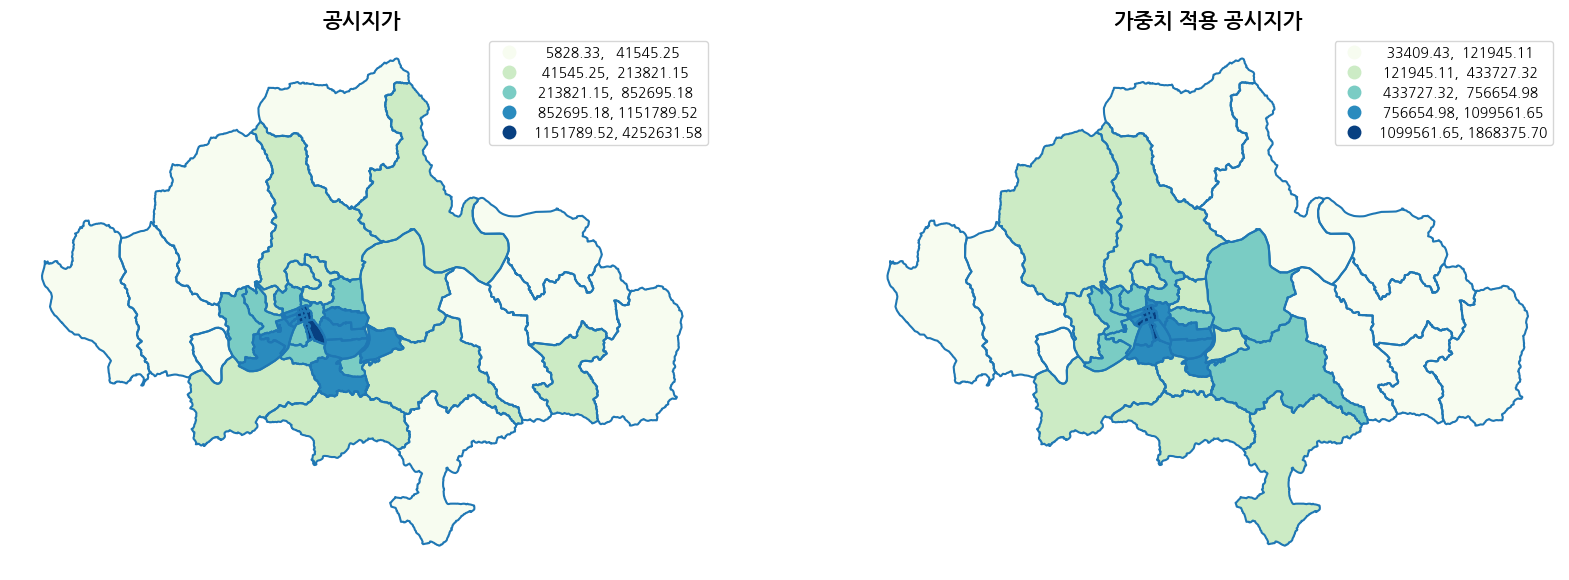

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))

nbr_final.plot(column='avg_price', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax[0]) # 분위수
nbr_final.boundary.plot(ax=ax[0])
ax[0].set_title("공시지가", fontsize=15, fontweight='bold')
ax[0].axis('off')

nbr_final.plot(column='weighted_price', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax[1]) # 분위수
nbr_final.boundary.plot(ax=ax[1])
ax[1].set_title("가중치 적용 공시지가", fontsize=15, fontweight='bold')
ax[1].axis('off')

plt.show()

In [ ]:
# 광역적 공간 자기상관
y = nbr_final.avg_price
moran = esda.Moran(y, w)
moran.I, moran.p_sim # Moran의 I값, p-값

(0.5579910239314347, 0.001)

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


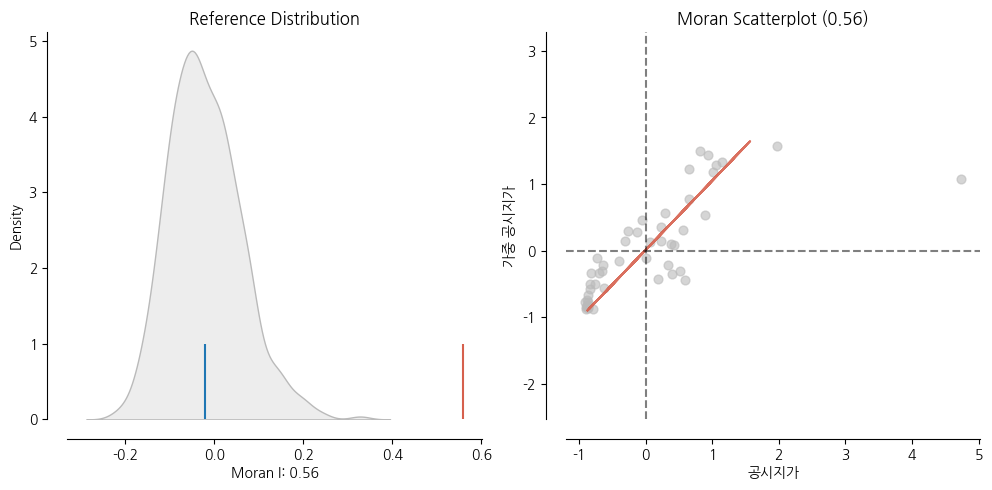

In [ ]:
plot_moran(moran, zstandard=True, figsize=(10,5))

plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('가중 공시지가')
plt.xlabel('공시지가')
plt.tight_layout()
plt.show()

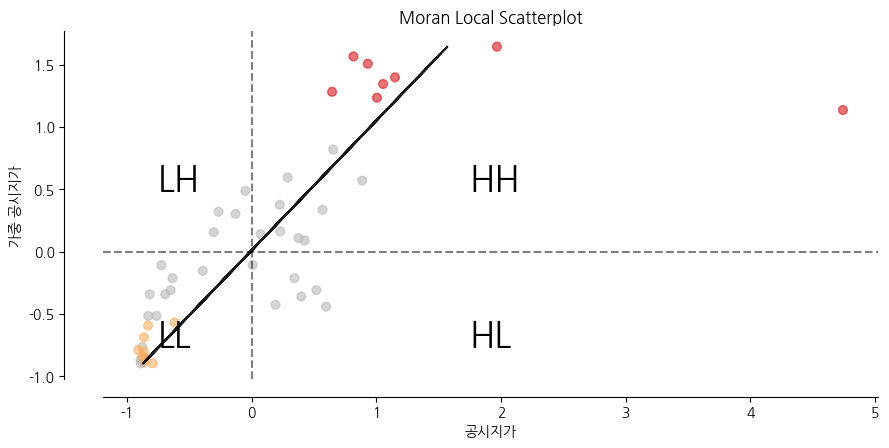

In [ ]:
moran_local = Moran_Local(y, w)

fig, ax = plt.subplots(figsize=(10,10))
moran_scatterplot(Moran_Local(y, w), p=0.05, ax=ax)
ax.set_xlabel('공시지가')
ax.set_ylabel('가중 공시지가')
plt.text(1.75, 0.50, 'HH', fontsize=25)
plt.text(1.75, -0.75, 'HL', fontsize=25)
plt.text(-0.75, 0.50, 'LH', fontsize=25)
plt.text(-0.75, -0.75, 'LL', fontsize=25)
plt.show()

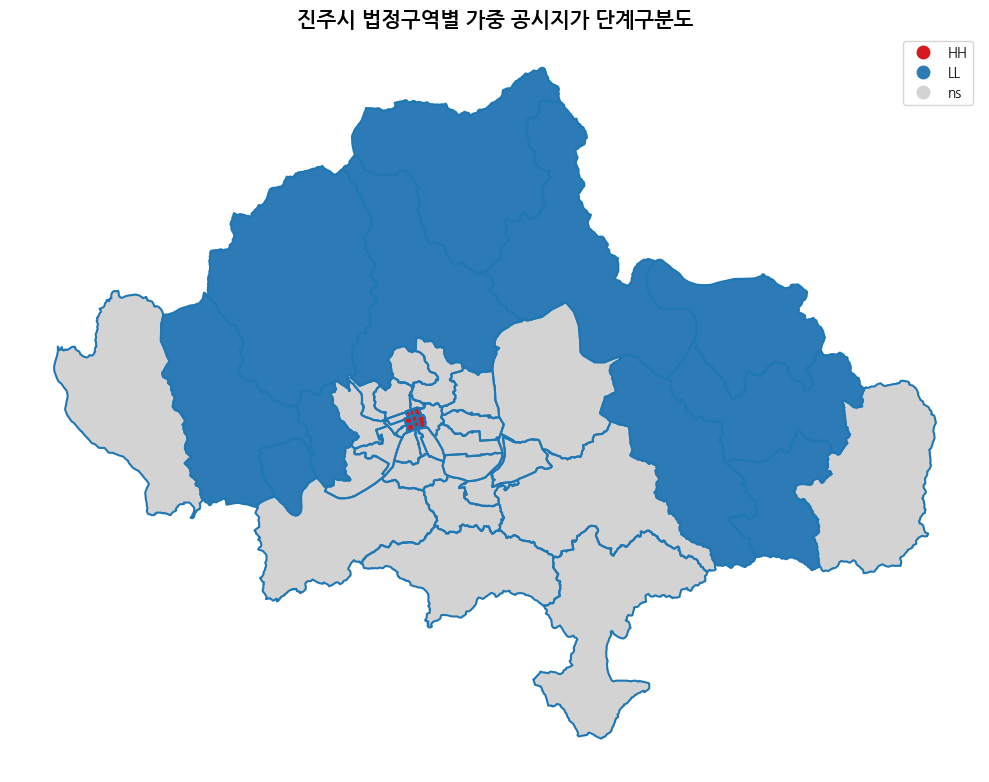

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
fig = lisa_cluster(moran_local, nbr_final, p=0.05, ax=ax)
nbr_final.boundary.plot(ax=ax)
plt.title('진주시 법정구역별 가중 공시지가 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()